In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
promoter = pd.read_csv('tmp/related_genes_SLC1A2_promoter.csv')
body = pd.read_csv('tmp/related_genes_SLC1A2.csv')
terminator = pd.read_csv('tmp/related_genes_SLC1A2_terminator.csv')

promoter['value'] /= promoter['value'].max()
body['value'] /= body['value'].max()
terminator['value'] /= terminator['value'].max()
# promoter['value'] = promoter.index
# body['value'] = body.index
# terminator['value'] = terminator.index
# promoter['value'] = promoter['value'].max() - promoter['value']
# body['value'] = body['value'].max() - body['value']
# terminator['value'] = terminator['value'].max() - terminator['value']

promoter['category'] = 'promoter'
body['category'] = 'body'
terminator['category'] = 'terminator'

genes = pd.concat([promoter, body, terminator])
genes

,index,value,name,category
0,15794,1.000000,MALAT1,promoter
1,15264,0.619261,SLC1A2,promoter
2,18428,0.511816,PCDH9,promoter
3,7265,0.329996,GPM6A,promoter
4,5505,0.284430,LSAMP,promoter
...,...,...,...,...
29115,13854,-0.099848,PARD3,terminator
29116,13736,-0.100182,CACNB2,terminator
29117,8227,-0.105527,PPP2R2B,terminator
29118,23665,-0.179869,DTNA,terminator


In [3]:
TF = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF', sep='\t', index_col=0)
TF_cofactors = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF_cofactors', sep='\t', index_col=0)
RBP = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_RBP', sep='\t', index_col=0, header=None)

In [4]:
TF, TF_cofactors, RBP = TF['Symbol'].unique(), TF_cofactors['Symbol'].unique(), RBP[1].unique()
gene_names = set(TF) | set(TF_cofactors) | set(RBP)

/tmp/ipykernel_114246/1212084909.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  _genes = _genes.loc[
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/seaborn/matrix.py:1221: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


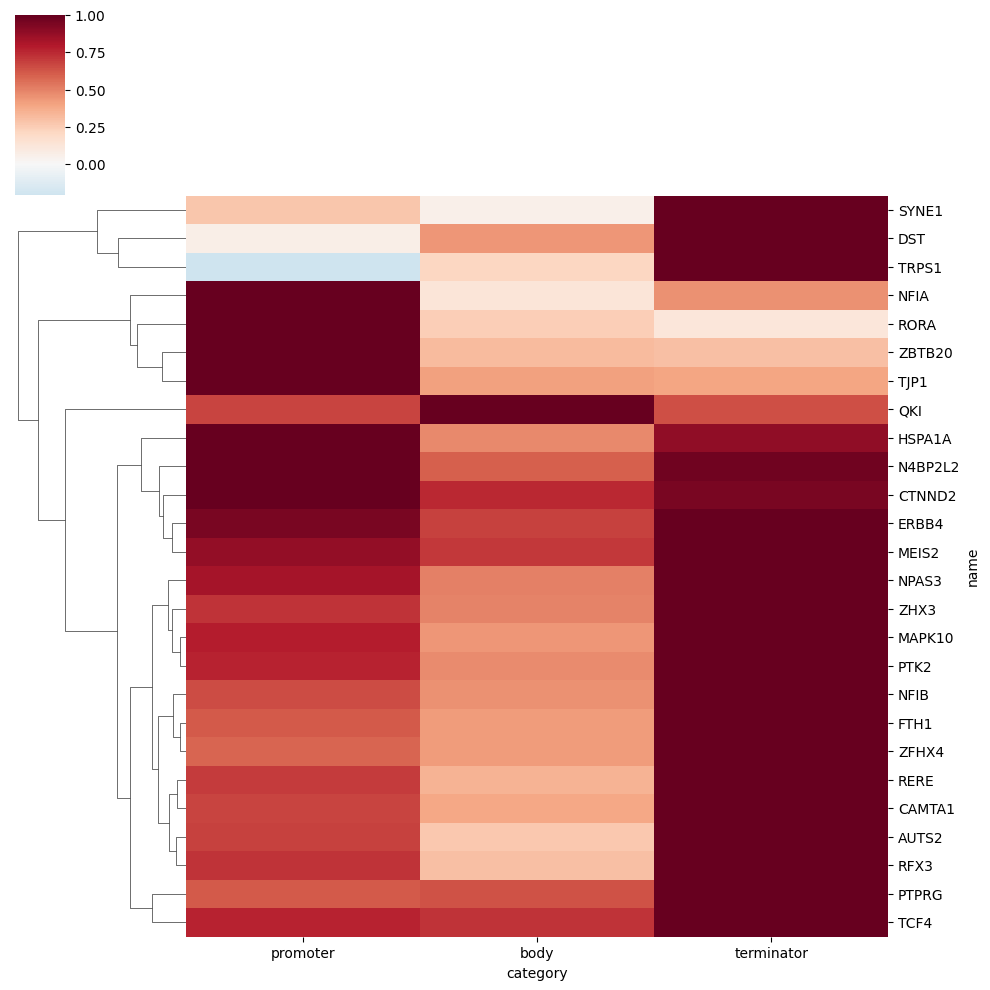

In [5]:
_genes = pd.pivot(genes[genes['name'].isin(gene_names)], index='name', columns='category', values='value')
_genes = _genes.loc[
    set(_genes.nlargest(20, 'promoter').index) |
    set(_genes.nlargest(20, 'body').index) |
    set(_genes.nlargest(20, 'terminator').index)
]
_genes = _genes.div(_genes.abs().max(axis=1), axis=0)

_genes = _genes[['promoter', 'body', 'terminator']]
sns.clustermap(data=_genes, square=True, cmap='RdBu_r', center=0, col_cluster=False)
plt.savefig(
    '/lmh_data/work/sclab/analyse/figure_file/differential related genes(SLC1A2).pdf',
    format='pdf', bbox_inches='tight')
plt.show()